In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



In [59]:
df = pd.read_csv('metrics_calculated.csv')

In [60]:
# Extract the accuracy value from the label column
df['accuracy'] = df['label'].str.extract(r'accuracy-(\d+)', expand=False).fillna(0).astype(int)
df['neighbor'] = df['label'].str.extract(r'N(\d+)', expand=False).fillna(0).astype(int)
df['user_type'] = df['label'].str.split('-').str[-1]
df['user_type'] = df['user_type'].map({'location': 'location', 'id': 'id', 'type': 'type'}).fillna('mix')
df['caching_mode'] = df['label'].str.split('-').str[3]
df['caching_mode'] = df['caching_mode'].map({'standard': 'standard', 'cooperative': 'cooperative'}).fillna('')

df.to_csv('to_lollo.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
#df = pd.read_csv('your_dataset.csv')

# List of features to plot
features = ['aoi', 'total_latency', 'number_of_requests_to_provider', 'hit_rate']

# List of user types
user_types = ['id', 'location', 'mix', 'type']

# For each feature
for feature in features:
    # For each user type
    for user_type in user_types:
        # Filter data for the current user type
        df_filtered = df[df['user_type'] == user_type]

        # Create a new figure for each graph
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # For each caching mode
        for caching_mode in df_filtered['caching_mode'].unique():
            # Filter data for the current caching mode
            df_caching = df_filtered[df_filtered['caching_mode'] == caching_mode]

            # Plot the data with error bars
            ax.errorbar(df_caching['accuracy'], df_caching['neighbor'], df_caching[feature+'_mean'], zerr=df_caching[feature+'_calculate_margin_error'], fmt='o', label=caching_mode)

        # Set labels
        ax.set_xlabel('Accuracy')
        ax.set_ylabel('Neighbor')
        ax.set_zlabel(feature.capitalize() + ' Mean')
        ax.set_title(f'{feature.capitalize()} for {user_type} User Type')

        # Show legend
        ax.legend()

        # Show the plot
        plt.show()


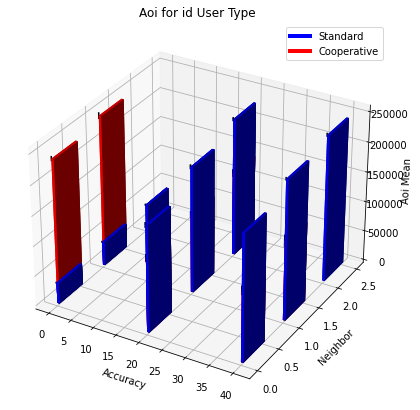

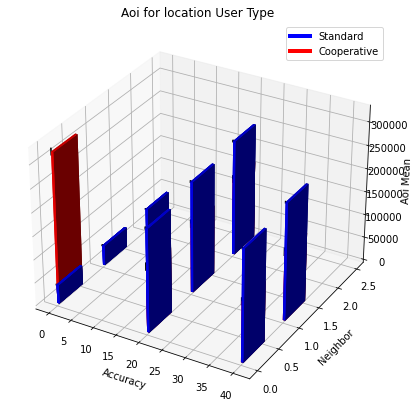

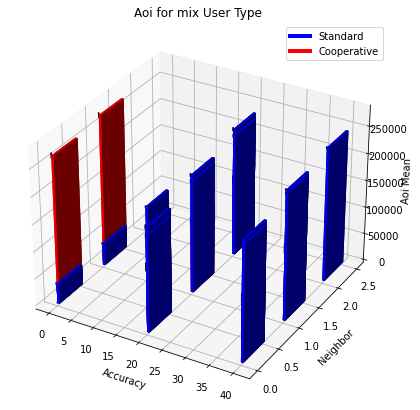

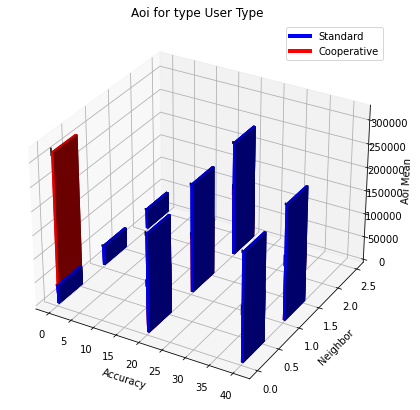

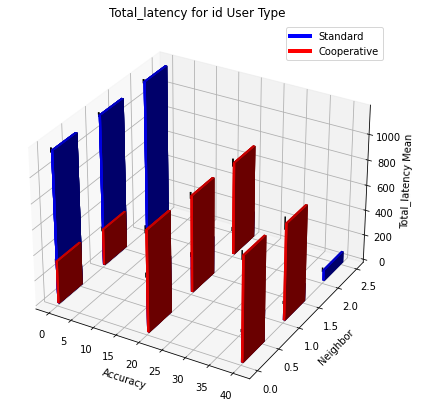

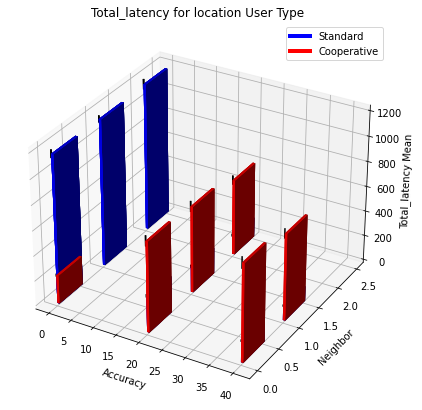

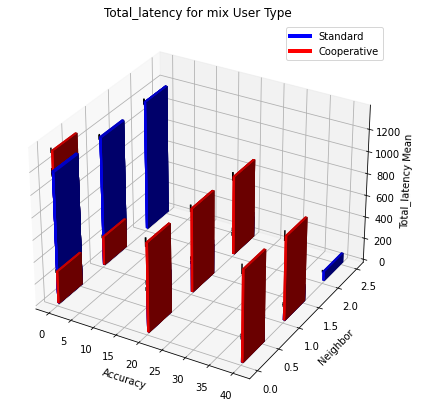

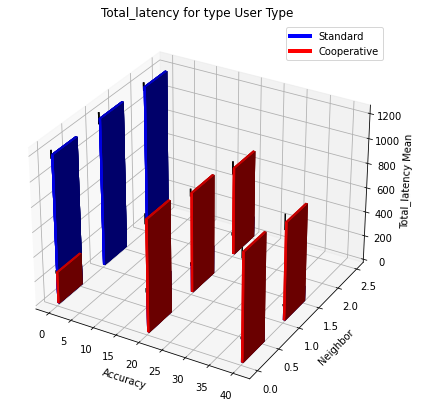

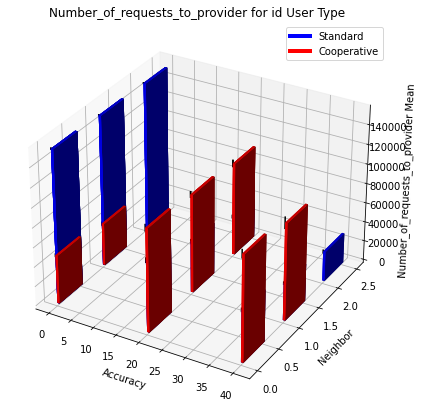

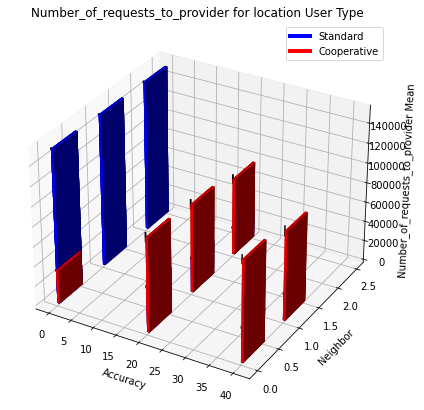

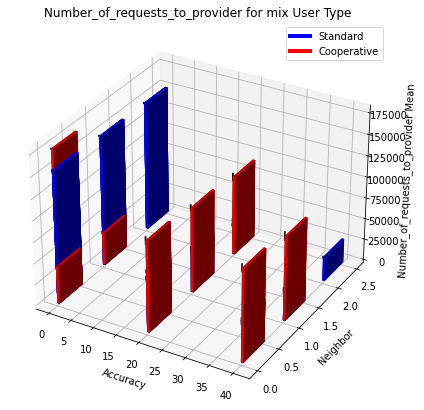

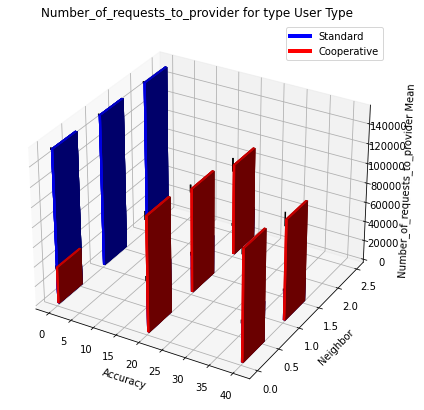

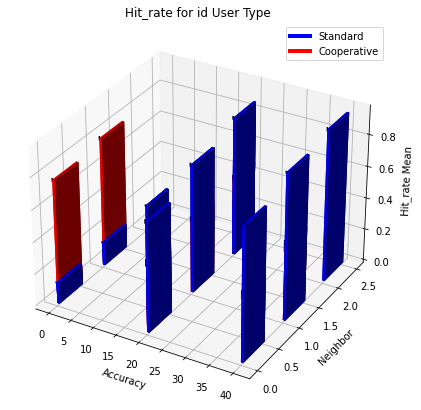

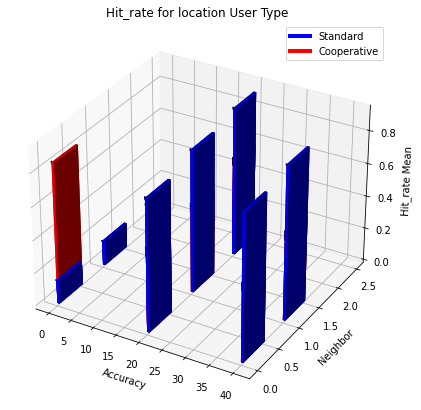

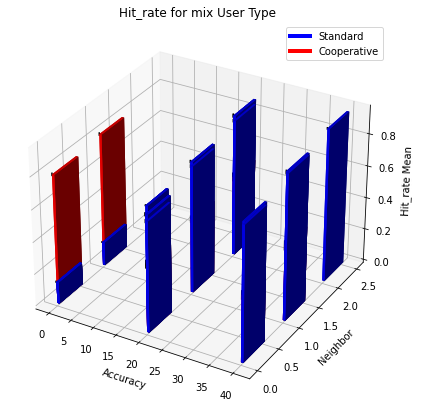

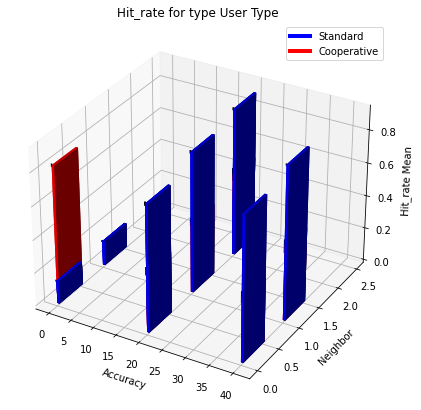

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the data

# List of features to plot
features = ['aoi', 'total_latency', 'number_of_requests_to_provider', 'hit_rate']

# List of user types
user_types = ['id', 'location', 'mix', 'type']

# Define the width and depth of the bars
width = depth = 0.5

# For each feature
for feature in features:
    # For each user type
    for user_type in user_types:
        # Filter data for the current user type
        df_filtered = df[df['user_type'] == user_type]

        # Create a new figure for each graph
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # For each caching mode
        for caching_mode in df_filtered['caching_mode'].unique():
            # Filter data for the current caching mode
            df_caching = df_filtered[df_filtered['caching_mode'] == caching_mode]

            # Plot the data as 3D bars
            ax.bar3d(df_caching['accuracy'], df_caching['neighbor'], np.zeros(len(df_caching)), width, depth, df_caching[feature+'_mean'], shade=True, color='b' if caching_mode == 'standard' else 'r')

            # Plot the error lines
            for x, y, z, err in zip(df_caching['accuracy'], df_caching['neighbor'], df_caching[feature+'_mean'], df_caching[feature+'_calculate_margin_error']):
                ax.plot([x, x], [y, y], [z - err, z + err], color='black')

        # Set labels
        ax.set_xlabel('Accuracy')
        ax.set_ylabel('Neighbor')
        ax.set_zlabel(feature.capitalize() + ' Mean')
        ax.set_title(f'{feature.capitalize()} for {user_type} User Type')

        # Create a custom legend
        from matplotlib.lines import Line2D
        custom_lines = [Line2D([0], [0], color='b', lw=4),
                        Line2D([0], [0], color='r', lw=4)]
        ax.legend(custom_lines, ['Standard', 'Cooperative'])

        # Show the plot
        plt.show()


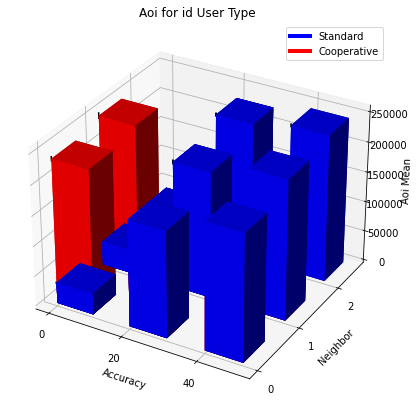

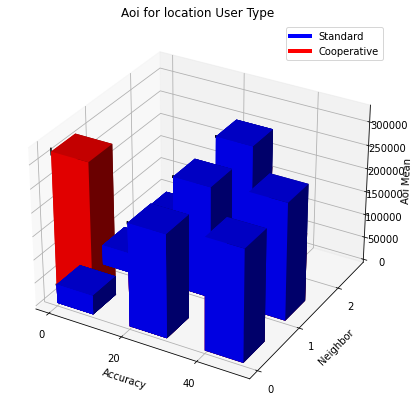

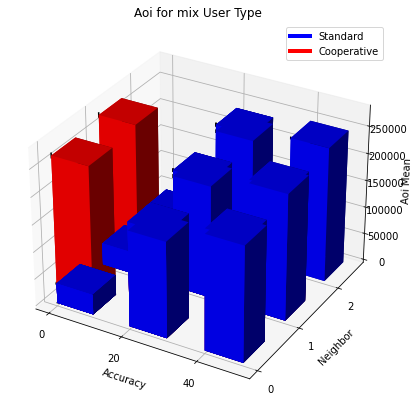

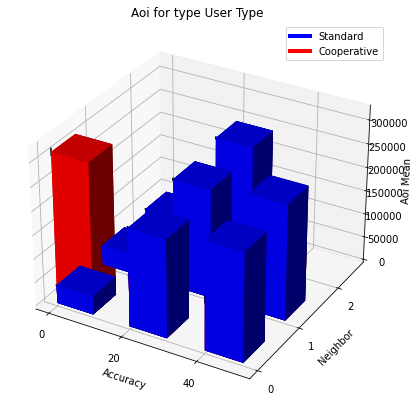

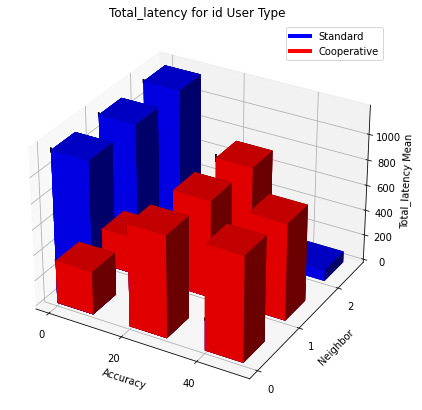

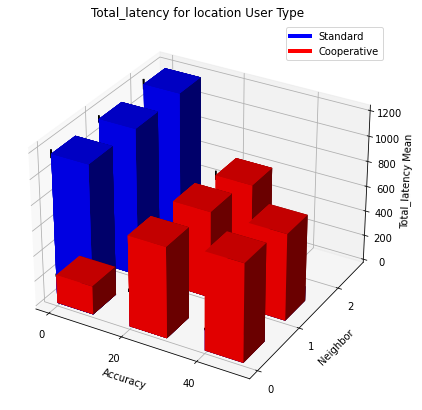

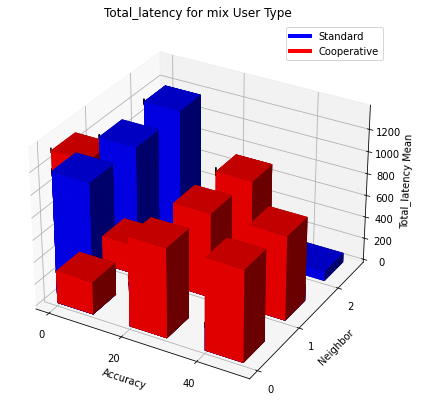

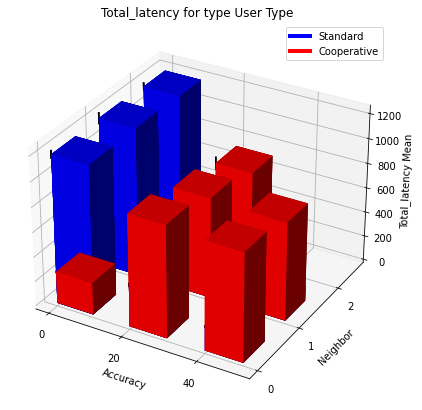

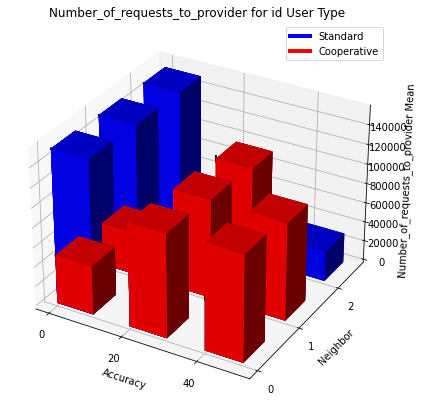

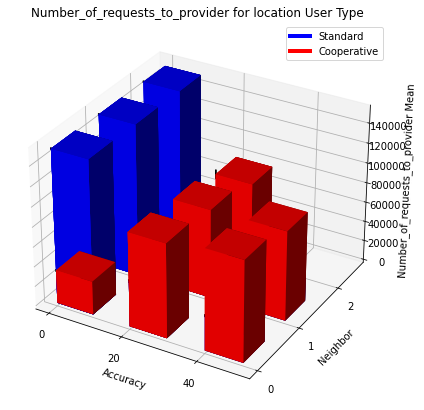

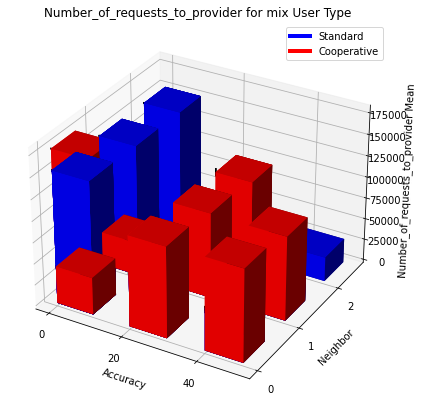

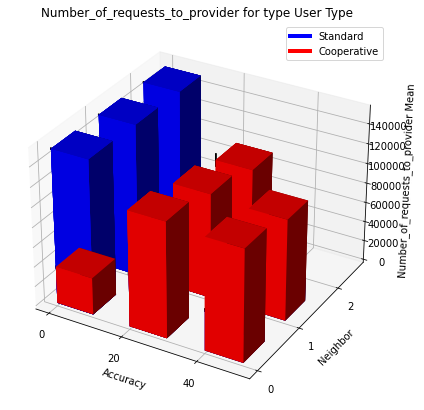

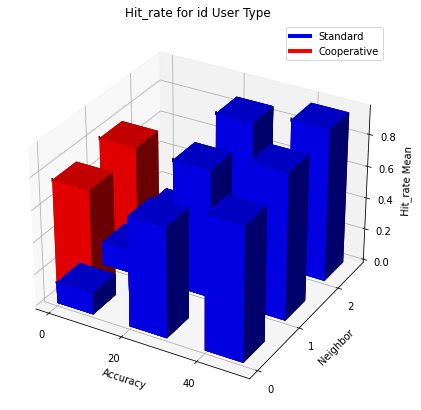

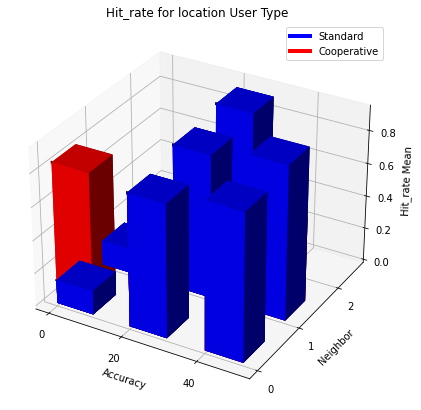

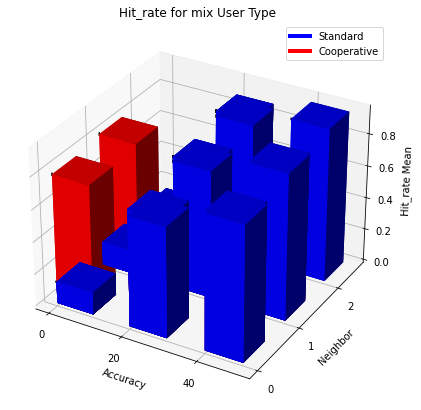

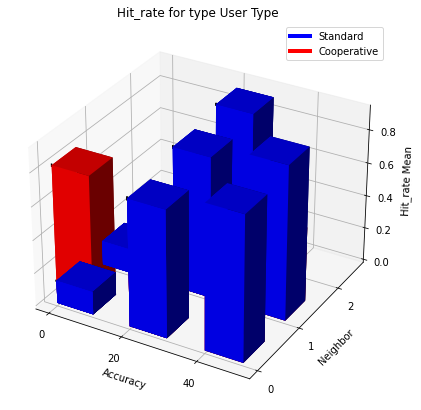

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the data
#df = pd.read_csv('your_dataset.csv')

# List of features to plot
features = ['aoi', 'total_latency', 'number_of_requests_to_provider', 'hit_rate']

# List of user types
user_types = ['id', 'location', 'mix', 'type']

# Define the width and depth of the bars
width = depth = 0.5

# Map for categorical axes
accuracy_map = {0: 0, 20: 1, 40: 2}
neighbor_map = {0: 0, 1: 1, 2: 2}

# Apply the maps to the 'accuracy' and 'neighbor' columns
df['accuracy'] = df['accuracy'].map(accuracy_map)
df['neighbor'] = df['neighbor'].map(neighbor_map)

# For each feature
for feature in features:
    # For each user type
    for user_type in user_types:
        # Filter data for the current user type
        df_filtered = df[df['user_type'] == user_type]

        # Create a new figure for each graph
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # For each caching mode
        for caching_mode in df_filtered['caching_mode'].unique():
            # Filter data for the current caching mode
            df_caching = df_filtered[df_filtered['caching_mode'] == caching_mode]

            # Plot the data as 3D bars
            ax.bar3d(df_caching['accuracy'], df_caching['neighbor'], np.zeros(len(df_caching)), width, depth, df_caching[feature+'_mean'], shade=True, color='b' if caching_mode == 'standard' else 'r')

            # Plot the error lines
            for x, y, z, err in zip(df_caching['accuracy'], df_caching['neighbor'], df_caching[feature+'_mean'], df_caching[feature+'_calculate_margin_error']):
                ax.plot([x, x], [y, y], [z - err, z + err], color='black')

        # Set labels
        ax.set_xlabel('Accuracy')
        ax.set_ylabel('Neighbor')
        ax.set_zlabel(feature.capitalize() + ' Mean')
        ax.set_title(f'{feature.capitalize()} for {user_type} User Type')

        # Create a custom legend
        from matplotlib.lines import Line2D
        custom_lines = [Line2D([0], [0], color='b', lw=4),
                        Line2D([0], [0], color='r', lw=4)]
        ax.legend(custom_lines, ['Standard', 'Cooperative'])

        # Set the ticks for the categorical axes
        ax.set_xticks([0, 1, 2])
        ax.set_yticks([0, 1, 2])
        ax.set_xticklabels(['0', '20', '40'])
        ax.set_yticklabels(['0', '1', '2'])

        # Show the plot
        plt.show()
